# Titanic Survival

#### The challenge:

Build a predictive model that answers the question: "what sorts of people were more likely to survive the Titanic sinking?

In [26]:
# data analysis and wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression

In [38]:
# Acquiring the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [42]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
#### Categóricos
Survived, Sex, , Cabin y Embarked

In [3]:
df = pd.concat([test, train])
df.head(-10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,0.0
877,878,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,0.0
878,879,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0.0
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1.0


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Preguntas técnicas.  
¿Qué se hace cuando un pasajero no tiene una edad registrada (campo nulo)?    
¿Cómo se reemplazan los datos numéricos y categóricos nulos?

### Descripción de los datos

- **PassengerId**  
    - Id del pasajero. 
    - No se tiene en cuenta para el modelo.
- **Pclass**  
    - Clase del Tiquete
    - 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase
- **Name**:  
    - Nombre del pasajero
    - No se tiene en cuenta para el modelo
- **Sex**:  
    - Sexo del pasajero. male o female.
- **Age**:  
    - Edad del pasajero.
    - Hay valores nulos
- **SibSp**:  
    - Número de hermanos / Cónyuges a bordo del Titanic.
- **Parch**:  
    - Número de padres / Niños a bordo del Titanic.
- **Ticket**:  
    - Número del tiquete
- **Fare**:  
    - Tarifa del pasajero
- **Cabin**: 
    - Número de cabina
- **Embarked**:  
    - Puerto de embarcación
    - C = Cherbourg, Q = Queenstown, S = Southampton  
- **Survided**:
    - Variable objetivo
    - ¿Un pasajero sobrevivió? 0 = No,  1 = Si
    - 891 datos no nulos. El resto se debería eliminar (?

- **Variables que se eliminarían por irrelevantes**:  
    - PassengerId  
    - Name  
    - Fare  

In [6]:
num = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
num.head(10)

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,34.5,0,0,7.8292,NaN
1,3,47.0,1,0,7.0000,NaN
2,2,62.0,0,0,9.6875,NaN
3,3,27.0,0,0,8.6625,NaN
4,3,22.0,1,1,12.2875,NaN
5,3,14.0,0,0,9.2250,NaN
6,3,30.0,0,0,7.6292,NaN
7,2,26.0,1,1,29.0000,NaN
8,3,18.0,0,0,7.2292,NaN
9,3,21.0,2,0,24.1500,NaN


In [8]:
num.notnull()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,True,True,True,True,True,False
1,True,True,True,True,True,False
2,True,True,True,True,True,False
3,True,True,True,True,True,False
4,True,True,True,True,True,False
...,...,...,...,...,...,...
886,True,True,True,True,True,True
887,True,True,True,True,True,True
888,True,False,True,True,True,True
889,True,True,True,True,True,True


In [9]:
num.notnull().apply(pd.Series.value_counts)

,Pclass,Age,SibSp,Parch,Fare,Survived
False,NaN,263,NaN,NaN,1,418
True,1309.0,1046,1309.0,1309.0,1308,891


In [11]:
(num != 0).apply(pd.Series.value_counts)

,Pclass,Age,SibSp,Parch,Fare,Survived
False,NaN,NaN,891,1002,17,549
True,1309.0,1309.0,418,307,1292,760


In [13]:
not_null_num_df = num.notnull()
not_null_num_df

,Pclass,Age,SibSp,Parch,Fare,Survived
0,True,True,True,True,True,False
1,True,True,True,True,True,False
2,True,True,True,True,True,False
3,True,True,True,True,True,False
4,True,True,True,True,True,False
...,...,...,...,...,...,...
886,True,True,True,True,True,True
887,True,True,True,True,True,True
888,True,False,True,True,True,True
889,True,True,True,True,True,True


Eliminamos todos los nulos de la variable objetivo

In [15]:
notnull_survived = not_null_num_df['Survived']
num = num[notnull_survived]
num

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0.0
1,1,38.0,1,0,71.2833,1.0
2,3,26.0,0,0,7.9250,1.0
3,1,35.0,1,0,53.1000,1.0
4,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0.0
887,1,19.0,0,0,30.0000,1.0
888,3,NaN,1,2,23.4500,0.0
889,1,26.0,0,0,30.0000,1.0


In [16]:
num.corr()

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


In [17]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Survived  891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 48.7 KB


Hay nulos en la edad, ¿Qué se hace con ellos?

<AxesSubplot:>

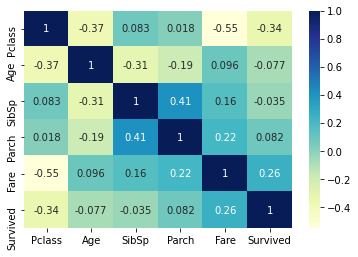

In [20]:
sns.heatmap(num.corr(), annot=True, cmap="YlGnBu")

## Modelación

In [21]:
y = num['Survived']
X = num.drop(['Survived'], axis=1)
X.head(1)

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.25


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [23]:
print(len(X))
print(len(X_train))
print(len(X_test))

891
534
357


In [24]:
from sklearn.linear_model import Lasso

model = Lasso()

In [25]:
# Se entrena el modelo
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
model.score(X_test, y_test)